# Simulación de ondas electromagnéticas en 3D 

**Resumen**

Este notebook presenta una simulación de ondas electromagnéticas en un medio tridimensional utilizando Python. La simulación se basa en una simplificación de las ecuaciones de Maxwell para modelar la propagación de ondas electromagnéticas en un medio homogéneo. Se utiliza una representación 3D para visualizar cómo las ondas se propagan y cambian a lo largo del tiempo. El enfoque incluye la generación de una animación que muestra la evolución dinámica de la onda, proporcionando una visión clara de su comportamiento en el espacio.

**Introducción**
Las ondas electromagnéticas son fundamentales en la física y tienen una amplia gama de aplicaciones en ciencia e ingeniería. La simulación de estas ondas en un medio tridimensional ayuda a entender su propagación, interacción con materiales y efectos en diferentes condiciones. En este contexto, se utiliza Python y la biblioteca matplotlib para visualizar el comportamiento de una onda electromagnética en un espacio tridimensional, permitiendo observar las características dinámicas de la onda a medida que se propaga a lo largo del tiempo.

**Modelo matemático**

Para modelar la propagación de ondas electromagnéticas, se utilizan las ecuaciones de Maxwell. En una simplificación, se puede representar el campo eléctrico 𝐸 como una onda viajera en un medio homogéneo. La ecuación general para una onda plana en 3D puede ser escrita como:

**𝐸(𝑥, 𝑦, 𝑧, 𝑡) = sin (2𝜋(𝑓⋅(𝑥/𝐿𝑥 + 𝑦/𝐿𝑦 + 𝑧/𝐿𝑧−𝑐⋅𝑡)))**

donde:
𝑓 es la frecuencia de la onda, 𝐿𝑥, 𝐿𝑦, 𝐿𝑧 son las dimensiones del dominio, 𝑐 es la velocidad de la onda en el medio, 𝑡 es el tiempo.
El modelo se implementa usando una malla tridimensional, y la evolución de la onda se actualiza en función del tiempo utilizando el método de diferencias finitas.

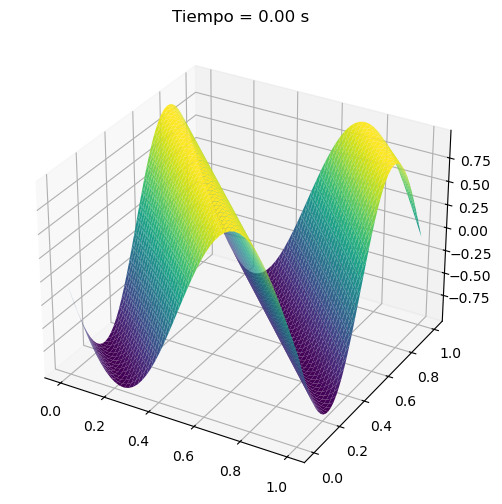

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Parámetros del sistema
epsilon = 8.854e-12  # Permisividad del vacío (Faradios por metro)
mu = 1.257e-6       # Permeabilidad del vacío (Henrios por metro)
c = 1 / np.sqrt(epsilon * mu)  # Velocidad de la luz en el vacío

# Espacio y tiempo
Nx, Ny, Nz = 50, 50, 50
Lx, Ly, Lz = 1.0, 1.0, 1.0  # Longitud del dominio en metros
dx, dy, dz = Lx / Nx, Ly / Ny, Lz / Nz
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z)

# Inicialización de campos
E = np.sin(2 * np.pi * (X + Y + Z))
dE_dt = np.zeros_like(E)

# Ecuación de onda en 3D
def wave_eq(t, y):
    E = y[:Nx*Ny*Nz].reshape((Nx, Ny, Nz))
    dE_dt = y[Nx*Ny*Nz:].reshape((Nx, Ny, Nz))
    d2E_dx2 = (np.roll(E, -1, axis=0) - 2*E + np.roll(E, 1, axis=0)) / dx**2
    d2E_dy2 = (np.roll(E, -1, axis=1) - 2*E + np.roll(E, 1, axis=1)) / dy**2
    d2E_dz2 = (np.roll(E, -1, axis=2) - 2*E + np.roll(E, 1, axis=2)) / dz**2
    d2E_dt2 = -c**2 * (d2E_dx2 + d2E_dy2 + d2E_dz2)
    return np.concatenate([dE_dt.flatten(), d2E_dt2.flatten()])

# Condiciones iniciales
E0 = np.sin(2 * np.pi * (X + Y + Z))
dE_dt0 = np.zeros_like(E0)

# Resolver la ecuación
y0 = np.concatenate([E0.flatten(), dE_dt0.flatten()])
t_span = (0, 1)  # Tiempo de simulación
t_eval = np.linspace(0, 1, 50)  # Evaluar en más puntos de tiempo
sol = solve_ivp(wave_eq, t_span, y0, method='RK45', t_eval=t_eval)

# Graficar resultados
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(sol.t), max(len(sol.t)//10, 1)):
    E = sol.y[:Nx*Ny*Nz, i].reshape((Nx, Ny, Nz))
    ax.clear()
    # Graficar el plano central del dominio en Z
    ax.plot_surface(X[:, :, Nz//2], Y[:, :, Nz//2], E[:, :, Nz//2], cmap='viridis')
    ax.set_title(f'Tiempo = {sol.t[i]:.2f} s')
    plt.pause(0.1)

plt.show()


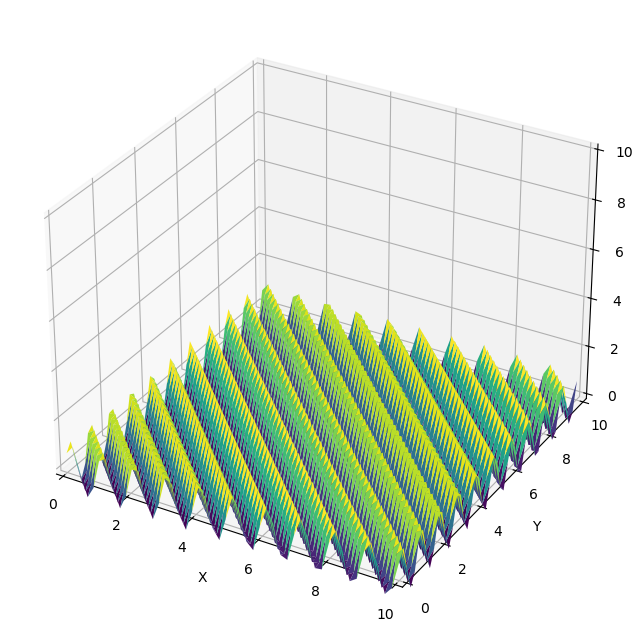

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de la simulación
Lx, Ly, Lz = 10.0, 10.0, 10.0   # Tamaño del dominio en metros
Nx, Ny, Nz = 50, 50, 50         # Número de puntos en cada dirección
dx, dy, dz = Lx / Nx, Ly / Ny, Lz / Nz  # Tamaño del paso espacial
dt = 0.01                       # Paso de tiempo (s)
Nt = 200                        # Número de pasos de tiempo
c = 1.0                         # Velocidad de la onda (m/s)

# Inicializar la malla espacial
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Inicializar el campo eléctrico
E = np.sin(2 * np.pi * (X + Y + Z))

# Crear la figura para la animación
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar los límites y etiquetas
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_zlim(0, Lz)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Crear una superficie inicial
surf = ax.plot_surface(X[:, :, Nz // 2], Y[:, :, Nz // 2], E[:, :, Nz // 2], cmap='viridis')

def update(frame):
    global E
    # Actualizar el campo eléctrico usando la ecuación de onda en 3D
    E_new = np.sin(2 * np.pi * (X + Y + Z - c * frame * dt))
    E = np.copy(E_new)
    
    # Actualizar la superficie de la animación
    ax.clear()
    surf = ax.plot_surface(X[:, :, Nz // 2], Y[:, :, Nz // 2], E[:, :, Nz // 2], cmap='viridis')
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return surf,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=Nt, blit=False, interval=50)

# Mostrar la animación
plt.show()




In [4]:
%matplotlib inline


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

# Verificar el backend actual y establecerlo si es necesario
print("Backend actual de Matplotlib:", matplotlib.get_backend())
matplotlib.use('TkAgg')  # Cambia a 'TkAgg' si es necesario

# Parámetros de la simulación
Lx, Ly, Lz = 10.0, 10.0, 10.0   # Tamaño del dominio en metros
Nx, Ny, Nz = 50, 50, 50         # Número de puntos en cada dirección
dx, dy, dz = Lx / Nx, Ly / Ny, Lz / Nz  # Tamaño del paso espacial
dt = 0.1                        # Paso de tiempo (s)
Nt = 200                        # Número de pasos de tiempo
c = 1.0                         # Velocidad de la onda (m/s)
omega = 2 * np.pi / Lx          # Frecuencia angular

# Inicializar la malla espacial
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Crear la figura para la animación
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar los límites y etiquetas
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Crear una superficie inicial
def plot_surface(ax, E):
    ax.clear()
    Z_slice = E[:, :, Nz // 2]  # Tomar una capa central
    X_slice, Y_slice = X[:, :, Nz // 2], Y[:, :, Nz // 2]
    ax.plot_surface(X_slice, Y_slice, Z_slice, cmap='viridis')
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

def update(frame):
    # Calcular el campo eléctrico para el paso actual del tiempo
    E = np.sin(2 * np.pi * (X / Lx + Y / Ly + Z / Lz - c * frame * dt))
    plot_surface(ax, E)
    return ax,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=Nt, blit=False, interval=50)

# Mostrar la animación
plt.show()



Backend actual de Matplotlib: module://matplotlib_inline.backend_inline


In [2]:
ani.save('onda_3d.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.
